In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
filename="/content/pima-indians-diabetes.data.csv"
names=["preg","plas","pres","skin","test","mass","pedi","age","class"]
dataframe=pd.read_csv(filename,names=names)
array=dataframe.values
x=array[:,0:8]
y=array[:,8]

In [ ]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

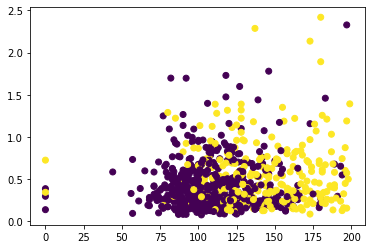

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(dataframe["plas"],dataframe["pedi"],c=dataframe["class"])

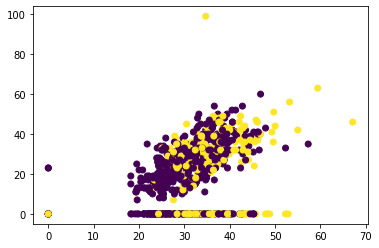

In [ ]:
plt.scatter(dataframe["mass"],dataframe["skin"],c=dataframe["class"])

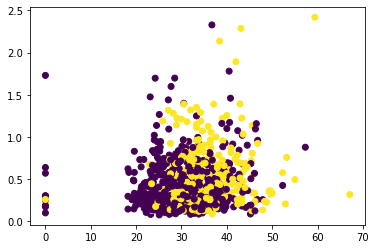

In [ ]:
plt.scatter(dataframe["mass"],dataframe["pedi"],c=dataframe["class"])

In [ ]:
clf=SVC(kernel='rbf',gamma=0.0001)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)*100
print("Accuracy",acc)
confusion_matrix(y_test,y_pred)

Accuracy 73.59307359307358


array([[134,  10],
       [ 51,  36]])

Grid Search CV

In [ ]:
clf=SVC()
param_grid=[{"kernel":["rbf"],"gamma":[50,5,10,0.5,1,0.0001],"C":[1,15,14,13,12,11,10,0.1]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 15, 14, 13, 12, 11, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.0001],
                          'kernel': ['rbf']}])

In [ ]:
gsv.best_params_,gsv.best_score_

({'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}, 0.7615653389238295)

In [ ]:
clf=SVC(C=1,gamma=0.0001,kernel='rbf')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)*100
print("Accuracy=",acc)
confusion_matrix(y_test,y_pred)

Accuracy= 73.59307359307358


array([[134,  10],
       [ 51,  36]])